In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
schedule = pd.read_csv('./schedule5/fixed_schedule_bus600_gen4_20250129_091442.csv')
# schedule = schedule.rename(columns={'Bus':'bus','Trip ID':'trip_id'})
schedule.head()

,bus,trip_id,route_id,service_id,shape_id,start_time,end_time,start_stop,end_stop,start_stop_name,start_stop_lat,start_stop_lon,end_stop_name,end_stop_lat,end_stop_lon
0,0,16107,32,weekday,shp_1_18,04:45:00,05:13:06,49,121,New Delhi,28.642944,77.222351,Dwarka Sector - 21,28.552322,77.056198
1,0,6795,14,weekday,shp_1_7,05:15:00,05:43:06,121,49,Dwarka Sector - 21,28.552322,77.056198,New Delhi,28.642944,77.222351
2,0,9335,18,weekday,shp_1_6,05:44:22,06:34:52,1,21,Dilshad Garden,28.675991,77.321495,Rithala,28.720821,77.105042
3,0,16118,32,weekday,shp_1_18,06:35:00,07:03:06,49,121,New Delhi,28.642944,77.222351,Dwarka Sector - 21,28.552322,77.056198
4,0,9346,18,weekday,shp_1_6,07:03:12,07:53:42,1,21,Dilshad Garden,28.675991,77.321495,Rithala,28.720821,77.105042


In [129]:
trips = pd.read_csv('formatted_DMRC_trips.csv')
trips.head()
trips.columns

Index(['Unnamed: 0', 'route_id', 'service_id', 'trip_id', 'trip_headsign',
       'trip_short_name', 'direction_id', 'block_id', 'shape_id',
       'wheelchair_accessible', 'bikes_allowed', 'start_time_y', 'end_time_y',
       'start_stop_y', 'end_stop_y'],
      dtype='object')

In [130]:
schedule_trips_merge = pd.merge(schedule, trips, on='trip_id')
schedule_trips_merge = schedule_trips_merge.drop(columns=['service_id', 'trip_headsign','trip_short_name','direction_id','block_id','wheelchair_accessible','bikes_allowed','Unnamed: 0'])
schedule_trips_merge.head()

KeyError: "['service_id'] not found in axis"

In [107]:
stops = pd.read_csv('DMRC_Data/stops.txt')
stops_cleaned = stops.drop(columns=['stop_code', 'stop_desc'])
stops_cleaned.head()

,stop_id,stop_name,stop_lat,stop_lon
0,1,Dilshad Garden,28.675991,77.321495
1,2,Jhilmil,28.675648,77.312393
2,3,Mansrover park,28.675352,77.301178
3,4,Shahdara,28.673531,77.287270
4,5,Welcome,28.671986,77.277931


In [ ]:
times = pd.read_csv('DMRC_Data/stop_times.txt')
times_cleaned = times.drop(columns=['stop_headsign','pickup_type','drop_off_type','timepoint', 'continuous_pickup', 'continuous_drop_off'])
times_cleaned.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,shape_dist_traveled
0,0,05:28:08,05:28:28,21,0,0.000
1,0,05:30:58,05:31:18,20,1,1202.405
2,0,05:33:28,05:33:48,19,2,2480.750
3,0,05:35:33,05:35:53,18,3,3314.936
4,0,05:37:53,05:38:13,17,4,4300.216


In [ ]:
stops_times_merge = pd.merge(times_cleaned, stops_cleaned)
stops_times_merge.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,shape_dist_traveled,stop_name,stop_lat,stop_lon
0,0,05:28:08,05:28:28,21,0,0.000,Rithala,28.720821,77.105042
1,0,05:30:58,05:31:18,20,1,1202.405,Rohini West,28.715008,77.115746
2,0,05:33:28,05:33:48,19,2,2480.750,Rohini East,28.707941,77.125732
3,0,05:35:33,05:35:53,18,3,3314.936,Pitampura,28.703180,77.132355
4,0,05:37:53,05:38:13,17,4,4300.216,Kohat Enclave,28.697943,77.140465


In [110]:
trip_distances = stops_times_merge.groupby('trip_id')['shape_dist_traveled'].last() / 1000
schedule_combined = pd.merge(schedule_trips_merge, trip_distances, on='trip_id')
schedule_combined.head()

,bus,trip_id,route_id,shape_id,start_time_y,end_time_y,start_stop_y,end_stop_y,shape_dist_traveled
0,0,16107,32,shp_1_18,04:45:00,05:13:06,49,121,21.991316
1,0,6795,14,shp_1_7,05:15:00,05:43:06,121,49,21.991313
2,0,9335,18,shp_1_6,05:44:22,06:34:52,1,21,24.382398
3,0,16118,32,shp_1_18,06:35:00,07:03:06,49,121,21.991316
4,0,9346,18,shp_1_6,07:03:12,07:53:42,1,21,24.382398


In [111]:
schedule_combined[schedule_combined['bus'] == 1].sort_values('start_time_y')

,bus,trip_id,route_id,shape_id,start_time_y,end_time_y,start_stop_y,end_stop_y,shape_dist_traveled
20,1,16108,32,shp_1_18,04:55:00,05:23:06,49,121,21.991316
21,1,1421,3,shp_1_25,05:24:36,06:13:43,62,44,22.245199
22,1,6033,12,shp_1_16,06:13:45,07:21:57,108,81,35.944730
23,1,12956,24,shp_1_36,07:22:08,08:58:19,72,121,44.628383
24,1,15380,30,shp_1_8,08:58:20,10:06:32,81,108,35.944730
25,1,472,1,shp_1_32,10:06:42,11:16:17,21,225,33.697449
26,1,14129,27,shp_1_5,11:16:24,12:16:11,138,8,27.666271
27,1,11505,22,shp_1_22,12:16:12,12:41:11,62,71,14.527313
28,1,17421,35,shp_1_10,12:41:15,13:09:35,520,508,17.323963
29,1,10830,21,shp_1_34,13:09:59,13:59:06,44,62,22.246105


In [112]:
def adjust_time_to_next_day(time_str):
    try:
        # Split the time into components
        time_parts = time_str.split(':')
        hour = int(time_parts[0])
        
        # Check if hour is >= 24
        if hour >= 24:
            # Subtract 24 from hours and shift the time to the next day
            adjusted_hour = hour - 24
            adjusted_time_str = f"{adjusted_hour:02}:{time_parts[1]}:{time_parts[2]}"
            return pd.to_datetime(adjusted_time_str) + pd.Timedelta(days=1)
        else:
            return pd.to_datetime(time_str)
    except Exception as e:
        print(f"Error adjusting time: {time_str}, {e}")
        return None

In [113]:
schedule_combined.groupby('bus')['shape_dist_traveled'].agg('sum')

bus
0      558.475425
1      556.553237
2      572.099138
4      430.092558
5      597.909988
          ...    
592    201.287509
594    470.066320
595    476.227870
597    375.505573
598    190.568826
Name: shape_dist_traveled, Length: 365, dtype: float64

In [114]:
bus_statistics = pd.DataFrame(schedule_combined.groupby('bus')['shape_dist_traveled'].agg('sum'))
bus_statistics.head()

,shape_dist_traveled
bus,
0,558.475425
1,556.553237
2,572.099138
4,430.092558
5,597.909988


In [115]:
bus_statistics['trip_count'] = schedule_combined.groupby('bus').agg('size')

In [ ]:
bus_statistics.describe()

,shape_dist_traveled,trip_count
count,365.000000,365.000000
mean,447.442534,14.761644
std,148.900923,5.543599
min,10.425216,1.000000
25%,424.835548,13.000000
50%,481.518136,16.000000
75%,519.655986,18.000000
max,891.991522,36.000000


In [117]:
schedule_combined_sorted = schedule_combined.sort_values(by=['bus', 'start_time_y'])

In [ ]:
bus_statistics['travel_time'] = (pd.to_datetime(schedule_combined_sorted.groupby('bus')['end_time_y'].last().apply(adjust_time_to_next_day)) - pd.to_datetime(schedule_combined_sorted.groupby('bus')['start_time_y'].first().apply(adjust_time_to_next_day))).dt.total_seconds() / 3600
bus_statistics.head()

,shape_dist_traveled,trip_count,travel_time
bus,,,
0,558.475425,20,18.635000
1,556.553237,17,18.953889
2,572.099138,17,18.575833
4,430.092558,11,14.575833
5,597.909988,25,19.243333


In [119]:
mileage = 3.7
petrol_price = 94.77
bus_statistics['petrol_charges'] = bus_statistics['shape_dist_traveled'] / mileage * petrol_price

In [120]:
co2_emission_factor = 2.31  
fuel_consumption_per_km = mileage
bus_statistics['carbon_emissions'] = (
    bus_statistics['shape_dist_traveled'] * fuel_consumption_per_km * co2_emission_factor
)

In [121]:
bus_statistics.describe()

,shape_dist_traveled,trip_count,travel_time,petrol_charges,carbon_emissions
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,447.442534,14.761644,15.861368,11460.575389,3824.291337
std,148.900923,5.543599,3.081396,3813.875803,1272.656189
min,10.425216,1.000000,0.316667,267.026411,89.104321
25%,424.835548,13.000000,15.470833,10881.531050,3631.069429
50%,481.518136,16.000000,16.630000,12333.371283,4115.535508
75%,519.655986,18.000000,17.329722,13310.215620,4441.499712
max,891.991522,36.000000,19.243333,22847.036903,7623.851539


In [122]:
bus_statistics.head()

,shape_dist_traveled,trip_count,travel_time,petrol_charges,carbon_emissions
bus,,,,,
0,558.475425,20,18.635000,14304.517845,4773.289457
1,556.553237,17,18.953889,14255.283857,4756.860517
2,572.099138,17,18.575833,14653.469002,4889.731332
4,430.092558,11,14.575833,11016.181546,3676.001093
5,597.909988,25,19.243333,15314.575558,5110.336667


<Figure size 1500x600 with 0 Axes>

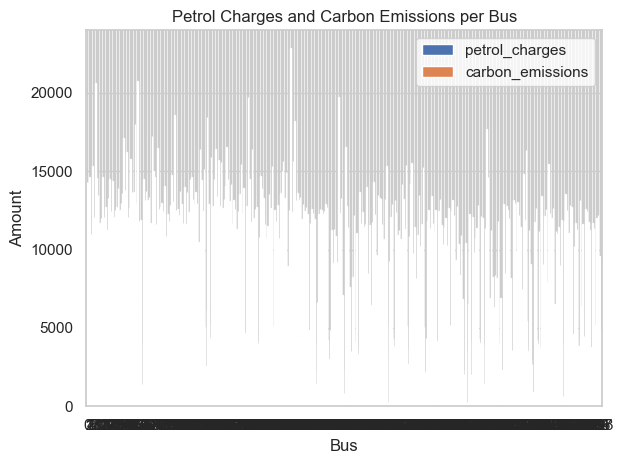

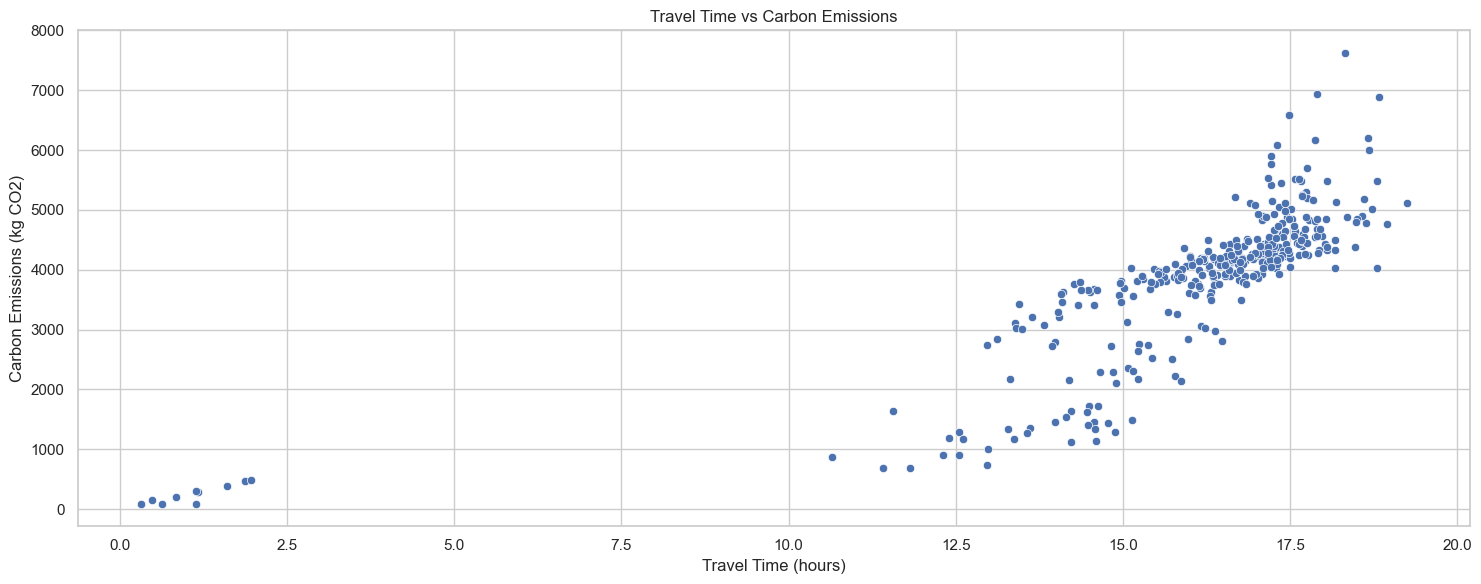

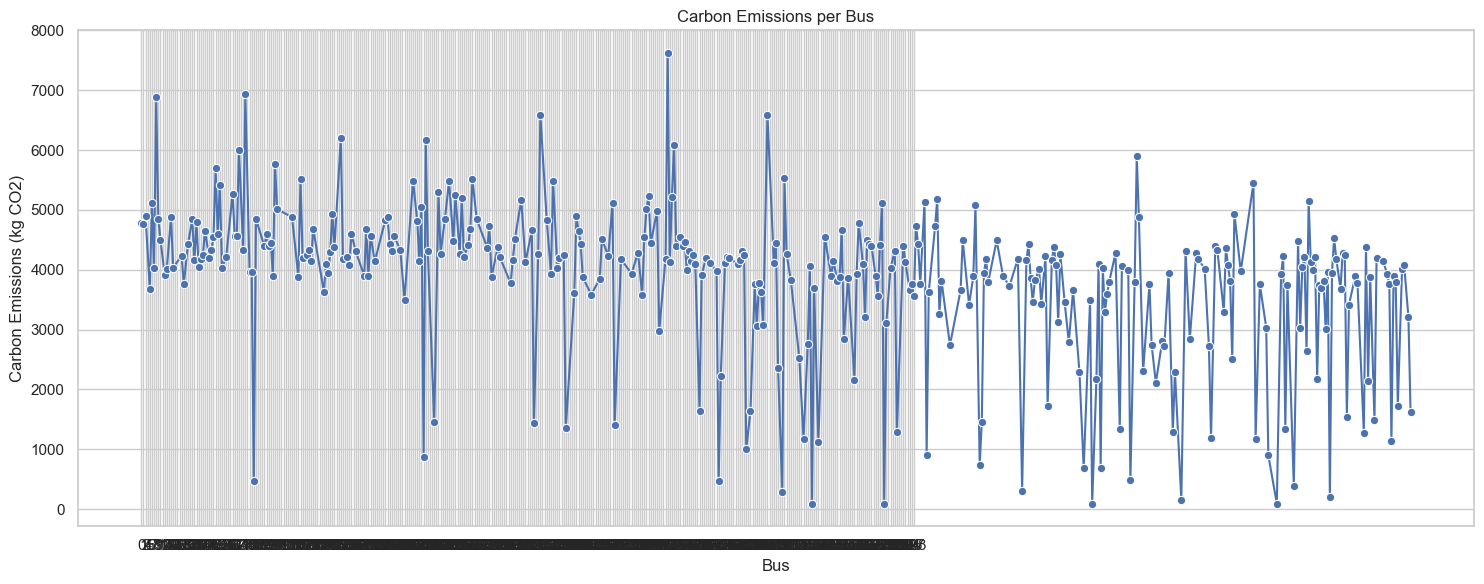

In [ ]:
# Assuming the dataframe is named 'bus_statistics'
# Set the style for seaborn
sns.set(style="whitegrid")

# Bar plot for Petrol Charges and Carbon Emissions
plt.figure(figsize=(15, 6))
bus_statistics[['petrol_charges', 'carbon_emissions']].plot(kind='bar', width=0.8)
plt.title('Petrol Charges and Carbon Emissions per Bus')
plt.ylabel('Amount')
plt.xlabel('Bus')
plt.xticks(range(len(bus_statistics)), bus_statistics.index, rotation=0)
plt.tight_layout()
plt.show()

# Scatter plot to show relationship between Travel Time and Carbon Emissions
plt.figure(figsize=(15, 6))
sns.scatterplot(x='travel_time', y='carbon_emissions', data=bus_statistics)
plt.title('Travel Time vs Carbon Emissions')
plt.xlabel('Travel Time (hours)')
plt.ylabel('Carbon Emissions (kg CO2)')
plt.tight_layout()
plt.show()

# Line plot to show how Carbon Emissions change across buses
plt.figure(figsize=(15, 6))
sns.lineplot(x=bus_statistics.index, y='carbon_emissions', data=bus_statistics, marker='o')
plt.title('Carbon Emissions per Bus')
plt.xlabel('Bus')
plt.ylabel('Carbon Emissions (kg CO2)')
plt.xticks(range(len(bus_statistics)), bus_statistics.index, rotation=0)
plt.tight_layout()
plt.show()

In [133]:
schedule[schedule['bus'] == 1]

,bus,trip_id,route_id,service_id,shape_id,start_time,end_time,start_stop,end_stop,start_stop_name,start_stop_lat,start_stop_lon,end_stop_name,end_stop_lat,end_stop_lon
20,1,16108,32,weekday,shp_1_18,04:55:00,05:23:06,49,121,New Delhi,28.642944,77.222351,Dwarka Sector - 21,28.552322,77.056198
21,1,1421,3,weekday,shp_1_25,05:24:36,06:13:43,62,44,Qutab Minar,28.512714,77.185791,Vishwavidyalaya,28.694765,77.212418
22,1,6033,12,weekday,shp_1_16,06:13:45,07:21:57,108,81,Janak Puri West,28.629637,77.077866,Botanical Garden,28.564198,77.334656
23,1,12956,24,weekday,shp_1_36,07:22:08,08:58:19,72,121,Vaishali,28.650059,77.337608,Dwarka Sector - 21,28.552322,77.056198
24,1,15380,30,weekday,shp_1_8,08:58:20,10:06:32,81,108,Botanical Garden,28.564198,77.334656,Janak Puri West,28.629637,77.077866
25,1,472,1,weekday,shp_1_32,10:06:42,11:16:17,21,225,Rithala,28.720821,77.105042,Shaheed Sthal (New Bus Adda),28.670177,77.416031
26,1,14129,27,weekday,shp_1_5,11:16:24,12:16:11,138,8,Badarpur Border,28.493200,77.300850,Kashmere Gate,28.667879,77.228012
27,1,11505,22,weekday,shp_1_22,12:16:12,12:41:11,62,71,Qutab Minar,28.512714,77.185791,Huda City Centre,28.459118,77.072586
28,1,17421,35,weekday,shp_1_10,12:41:15,13:09:35,520,508,Depot Station,28.488651,77.544075,Noida Sector 142,28.498999,77.412567
29,1,10830,21,weekday,shp_1_34,13:09:59,13:59:06,44,62,Vishwavidyalaya,28.694765,77.212418,Qutab Minar,28.512714,77.185791


In [125]:
schedule_combined.to_csv("schedule_combined.csv")

In [126]:
bus_statistics.to_csv("bus_statistics.csv")